# Project

In [1]:
import numpy as np
import random
import math
from math import pi
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.io as spio
from IPython.display import display
import scipy.sparse.linalg as ll
from scipy.spatial.distance import cdist
from sklearn.metrics import pairwise_distances
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import shortest_path
import sklearn.utils.graph_shortest_path as skug
from scipy.linalg import svd
from scipy import stats

from sklearn.cluster import KMeans

from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# from plotly.subplots import make_subplots

%matplotlib inline

In [2]:
# Read in the data
DATA_PATH = "data/"
spotify_artists_top_tracks_df = pd.read_csv('{}spotify_artists_top_tracks.csv'.format(DATA_PATH))
print("{} x {} table of data:".format(spotify_artists_top_tracks_df.shape[0], spotify_artists_top_tracks_df.shape[1]))
display(spotify_artists_top_tracks_df.head ())
print("Remove any N/As...\n\n")
spotify_artists_top_tracks_df = spotify_artists_top_tracks_df.dropna()
print("{} x {} table of data:".format(spotify_artists_top_tracks_df.shape[0], spotify_artists_top_tracks_df.shape[1]))
display(spotify_artists_top_tracks_df.head ())
print(spotify_artists_top_tracks_df.columns.tolist())

17306 x 24 table of data:


,artist_uri,artist_name,albumn_name,albumn_release_date,albumn_total_tracks,duration_ms,explicit,track_name,track_popularity,track_uri,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster_number,km_nn9_nc3
0,spotify:artist:7urq0VfqxEYEEiZUkebXT4,112,Part III,2001,16,193093,False,Peaches & Cream,65,spotify:track:2SLZ2rX5773RS16mcqBxG7,...,0,0.3340,0.00277,0.000000,0.0532,0.768,203.862,4,NaN,NaN
1,spotify:artist:7urq0VfqxEYEEiZUkebXT4,112,112,8/27/1996,19,289413,False,Only You (feat. The Notorious B.I.G. & Mase) -...,64,spotify:track:6zOg9gP62RJSsKFeOBAgvH,...,1,0.0480,0.02960,0.000000,0.0993,0.787,95.813,4,NaN,NaN
2,spotify:artist:7urq0VfqxEYEEiZUkebXT4,112,Part III,2001,16,231800,False,Dance With Me,64,spotify:track:6uRH1qMz30ZBwwUG0IYE5s,...,1,0.2030,0.02590,0.000000,0.0442,0.611,101.628,4,NaN,NaN
3,spotify:artist:7urq0VfqxEYEEiZUkebXT4,112,112,8/27/1996,19,252266,False,Cupid,63,spotify:track:3kVIFDE3G89I2RPVkiRaRj,...,1,0.1120,0.37300,0.000000,0.0371,0.870,175.562,4,NaN,NaN
4,spotify:artist:7urq0VfqxEYEEiZUkebXT4,112,Part III,2001,16,264933,False,It's Over Now,60,spotify:track:769geiA8btidGHda4BBDOJ,...,1,0.0409,0.01060,0.000007,0.0736,0.233,97.988,4,NaN,NaN


Remove any N/As...


5542 x 24 table of data:


,artist_uri,artist_name,albumn_name,albumn_release_date,albumn_total_tracks,duration_ms,explicit,track_name,track_popularity,track_uri,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster_number,km_nn9_nc3
40,spotify:artist:0MBIKH9DjtBkv8O3nS6szj,"10,000 Maniacs",MTV Unplugged,10/26/1993,14,223373,False,Because the Night - Live Unplugged,61,spotify:track:5VzvK7YiwWbRePA2JOzhYq,...,0,0.1030,0.2600,0.000270,0.7650,0.347,122.624,4,1.0,0.0
41,spotify:artist:0MBIKH9DjtBkv8O3nS6szj,"10,000 Maniacs",Our Time in Eden,1992,13,219893,False,These Are Days,56,spotify:track:786h4kDeZiX5nYvOwA3wtE,...,1,0.0351,0.0218,0.000204,0.0923,0.793,108.498,4,1.0,0.0
42,spotify:artist:0MBIKH9DjtBkv8O3nS6szj,"10,000 Maniacs",Love Among The Ruins,1/1/1997,12,245573,False,More Than This,53,spotify:track:5v6b9RUk83Z33shcsqt1m3,...,1,0.0271,0.0155,0.005730,0.0917,0.807,124.644,4,1.0,0.0
43,spotify:artist:0MBIKH9DjtBkv8O3nS6szj,"10,000 Maniacs",Blind Man's Zoo,5/2/1989,11,193560,False,Trouble Me,50,spotify:track:5nLhswlXx18vI65KkKKFgx,...,1,0.0341,0.1540,0.000000,0.1230,0.494,117.913,4,1.0,0.0
44,spotify:artist:0MBIKH9DjtBkv8O3nS6szj,"10,000 Maniacs",Our Time in Eden,1992,13,185960,False,Candy Everybody Wants,47,spotify:track:32xXojNvbRTQ9qfb3mWR69,...,1,0.0305,0.0193,0.006840,0.0987,0.867,104.970,4,1.0,0.0


['artist_uri', 'artist_name', 'albumn_name', 'albumn_release_date', 'albumn_total_tracks', 'duration_ms', 'explicit', 'track_name', 'track_popularity', 'track_uri', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'cluster_number', 'km_nn9_nc3']


In [3]:
artists_cluster = pd.read_csv('{}/clusters/uri_map_3rd_cluster.csv'.format(DATA_PATH))
print("{} x {} table of data:".format(artists_cluster.shape[0], artists_cluster.shape[1]))
display(artists_cluster.head ())
print("Remove any N/As...\n\n")
artists_cluster = artists_cluster.dropna()
print("{} x {} table of data:".format(artists_cluster.shape[0], artists_cluster.shape[1]))
display(artists_cluster.head ())
print(artists_cluster.columns)

110 x 16 table of data:


,uri,name,iso_nn6_nc2_1,iso_nn6_nc2_2,se_nn6_nc2_1,se_nn6_nc2_2,km_nn6_nc2,iso_nn9_nc3_1,iso_nn9_nc3_2,iso_nn9_nc3_3,se_nn9_nc3_1,se_nn9_nc3_2,se_nn9_nc3_3,km_nn9_nc3,iso_n6_p1,iso_n6_p2
0,spotify:artist:01WjpKiWVNurV5hjIadB8C,Filter,-0.827827,2.454767,-0.009891,0.059507,2,-0.609794,1.974029,-0.166049,-0.009891,0.059507,-0.012482,2,-1.098138,0.959740
1,spotify:artist:02NfyD6AlLA12crYzw5YcR,Jane's Addiction,-2.065492,8.415246,-0.012815,0.068954,6,-2.646985,8.068464,-1.208217,-0.012815,0.068954,0.008179,6,-2.007661,4.328638
2,spotify:artist:02da1vDJ2hWqfK7aJL6SJm,Soul Asylum,5.967168,4.189702,-0.018383,0.005573,7,4.841379,5.086020,3.594868,-0.018383,0.005573,-0.000926,7,1.924828,2.523396
3,spotify:artist:0539gq2LM2VDs01rp8gnGz,Submersed,-2.575314,-1.662407,0.062961,-0.005974,4,-2.373169,-1.891014,0.370791,0.062961,-0.005974,-0.100760,4,-1.634556,-1.115581
4,spotify:artist:07jc1IMGtecDZzOL9cP50t,Days Of The New,-1.721144,10.200222,-0.009354,0.060154,6,-2.772502,8.667534,-0.425490,-0.009354,0.060154,-0.004940,6,-2.674786,4.140454


Remove any N/As...


110 x 16 table of data:


,uri,name,iso_nn6_nc2_1,iso_nn6_nc2_2,se_nn6_nc2_1,se_nn6_nc2_2,km_nn6_nc2,iso_nn9_nc3_1,iso_nn9_nc3_2,iso_nn9_nc3_3,se_nn9_nc3_1,se_nn9_nc3_2,se_nn9_nc3_3,km_nn9_nc3,iso_n6_p1,iso_n6_p2
0,spotify:artist:01WjpKiWVNurV5hjIadB8C,Filter,-0.827827,2.454767,-0.009891,0.059507,2,-0.609794,1.974029,-0.166049,-0.009891,0.059507,-0.012482,2,-1.098138,0.959740
1,spotify:artist:02NfyD6AlLA12crYzw5YcR,Jane's Addiction,-2.065492,8.415246,-0.012815,0.068954,6,-2.646985,8.068464,-1.208217,-0.012815,0.068954,0.008179,6,-2.007661,4.328638
2,spotify:artist:02da1vDJ2hWqfK7aJL6SJm,Soul Asylum,5.967168,4.189702,-0.018383,0.005573,7,4.841379,5.086020,3.594868,-0.018383,0.005573,-0.000926,7,1.924828,2.523396
3,spotify:artist:0539gq2LM2VDs01rp8gnGz,Submersed,-2.575314,-1.662407,0.062961,-0.005974,4,-2.373169,-1.891014,0.370791,0.062961,-0.005974,-0.100760,4,-1.634556,-1.115581
4,spotify:artist:07jc1IMGtecDZzOL9cP50t,Days Of The New,-1.721144,10.200222,-0.009354,0.060154,6,-2.772502,8.667534,-0.425490,-0.009354,0.060154,-0.004940,6,-2.674786,4.140454


Index(['uri', 'name', 'iso_nn6_nc2_1', 'iso_nn6_nc2_2', 'se_nn6_nc2_1',
       'se_nn6_nc2_2', 'km_nn6_nc2', 'iso_nn9_nc3_1', 'iso_nn9_nc3_2',
       'iso_nn9_nc3_3', 'se_nn9_nc3_1', 'se_nn9_nc3_2', 'se_nn9_nc3_3',
       'km_nn9_nc3', 'iso_n6_p1', 'iso_n6_p2'],
      dtype='object')


In [4]:
joined_df = pd.merge(spotify_artists_top_tracks_df, artists_cluster, left_on="artist_uri", right_on="uri", how="inner")
joined_df = joined_df[['artist_uri', 'albumn_name', 'albumn_release_date',
       'albumn_total_tracks', 'duration_ms', 'explicit', 'track_name',
       'track_popularity', 'track_uri', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature']]
print("{} x {} table of data:".format(joined_df.shape[0], joined_df.shape[1]))
display(joined_df.head (10))

spotify_artists_top_tracks_df = joined_df
print(joined_df.columns)

690 x 21 table of data:


,artist_uri,albumn_name,albumn_release_date,albumn_total_tracks,duration_ms,explicit,track_name,track_popularity,track_uri,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,spotify:artist:2RTUTCvo6onsAnheUk3aL9,The Better Life,2000,11,233933,False,Kryptonite,80,spotify:track:6ZOBP3NvffbU4SZcrnt1k6,0.545,...,11,-5.708,0,0.0286,0.00664,0.000011,0.1680,0.543,99.009,4
1,spotify:artist:2RTUTCvo6onsAnheUk3aL9,Away From The Sun,11/12/2002,12,238733,False,Here Without You,77,spotify:track:3NLrRZoMF0Lx6zTlYqeIo4,0.557,...,10,-6.817,0,0.0252,0.04920,0.000000,0.2050,0.233,143.994,4
2,spotify:artist:2RTUTCvo6onsAnheUk3aL9,Away From The Sun,11/12/2002,12,260333,False,When I'm Gone,70,spotify:track:3WbphvawbMZ8FyqDxYGdSQ,0.530,...,7,-5.611,1,0.0284,0.00385,0.000000,0.1030,0.374,148.095,4
3,spotify:artist:2RTUTCvo6onsAnheUk3aL9,Here Without You (Acoustic),1/1/2004,1,232973,False,Here Without You - Acoustic,53,spotify:track:2HIU8kiFo9sB5ih05q8wgP,0.547,...,10,-6.282,0,0.0258,0.01980,0.000000,0.2050,0.311,143.752,4
4,spotify:artist:2RTUTCvo6onsAnheUk3aL9,3 Doors Down,1/1/2008,12,241960,False,It's Not My Time,63,spotify:track:0uybt73QFXaLCoxuVf6fhm,0.532,...,0,-4.798,1,0.0619,0.00133,0.000008,0.1060,0.309,128.025,4
5,spotify:artist:2RTUTCvo6onsAnheUk3aL9,The Better Life,2000,11,265906,False,Be Like That,62,spotify:track:3PbHle8KhJp6GuO1jLdEmQ,0.487,...,7,-6.043,1,0.0238,0.00528,0.000005,0.1290,0.306,95.982,4
6,spotify:artist:2RTUTCvo6onsAnheUk3aL9,The Better Life,2000,11,264800,False,Loser,61,spotify:track:1aC1IBAETh2XYGOE8kCC6t,0.493,...,6,-6.424,0,0.0693,0.01080,0.000027,0.2260,0.389,147.913,4
7,spotify:artist:2RTUTCvo6onsAnheUk3aL9,Away From The Sun,11/12/2002,12,232066,False,Away From The Sun,58,spotify:track:3THdexHRmED4euIY91Zrxc,0.541,...,0,-6.211,1,0.0271,0.02440,0.000000,0.0854,0.237,131.922,4
8,spotify:artist:2RTUTCvo6onsAnheUk3aL9,The Greatest Hits,1/1/2012,12,243053,False,Let Me Go,58,spotify:track:0nNVR2iDM3eVzEgMi78vQm,0.480,...,1,-4.914,0,0.0385,0.01810,0.000000,0.1110,0.491,91.972,4
9,spotify:artist:2RTUTCvo6onsAnheUk3aL9,3 Doors Down,1/1/2008,12,232906,False,Citizen/Soldier,55,spotify:track:7fKsaiVDwKe6VVsiGk48YG,0.631,...,8,-5.503,1,0.0343,0.01110,0.015600,0.1970,0.486,97.003,4


Index(['artist_uri', 'albumn_name', 'albumn_release_date',
       'albumn_total_tracks', 'duration_ms', 'explicit', 'track_name',
       'track_popularity', 'track_uri', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')


In [5]:
def make_normalized_df(df, col_sep):
    non_features = df[df.columns[:col_sep]]
    features = df[df.columns[col_sep:]]
    norm = MinMaxScaler().fit_transform(features)
    scaled = pd.DataFrame(norm, index=df.index, columns = df.columns[col_sep:])
    return pd.concat([non_features, scaled], axis=1)

## Exploratory Data Analysis

[0.6049046321525887, 0.8497706422018348, 1.0, 0.7716737728216903, 0.0, 0.012474484009979588, 0.006908032884667753, 1.1866235167206041e-05, 0.1550442838236791, 0.5388064481691043, 0.25205817310010814]


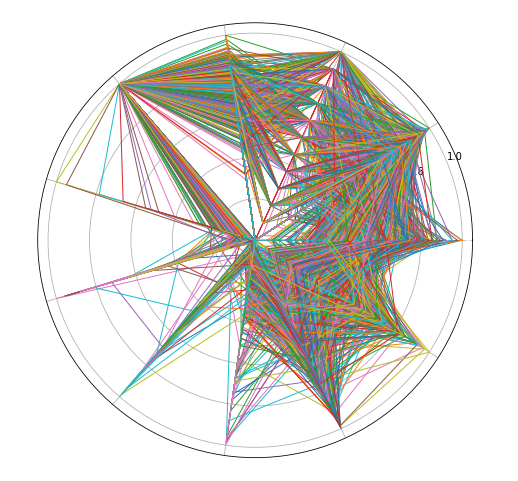

In [9]:


columns = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]
df1 = make_normalized_df(spotify_artists_top_tracks_df[columns], 0)
data = df1.values.tolist()

# temp = data[:1000]
# temp = [data[i] for i in randi]
print(data[0])
data1 = [i.append(i[0]) or i for i in data]
# print(data1[0])


# Initialise the spider plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
# print(columns)
angles = [n / float(len(columns)) * 2 * pi for n in range(len(columns))]
angles += angles[:1]

# print(angles)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], columns, color='white', size=8)



# Plot data
for i in data1:
    ax.plot(angles, i, linewidth=1, linestyle='solid')

    
# Show the graph
plt.show()

## Principal Components Analysis on the Track Characteristics

### PCA on tracks to see if there are any clusters in 2 dimensions

In [10]:
# Build the data matrix and condition it

columns = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]
df1 = spotify_artists_top_tracks_df[columns]
scaler = StandardScaler()
df1 = scaler.fit_transform(df1)

D_raw = df1
D_raw = D_raw.T

m, d = D_raw.shape
print("D_raw:", D_raw.shape)


D_raw: (11, 690)


690


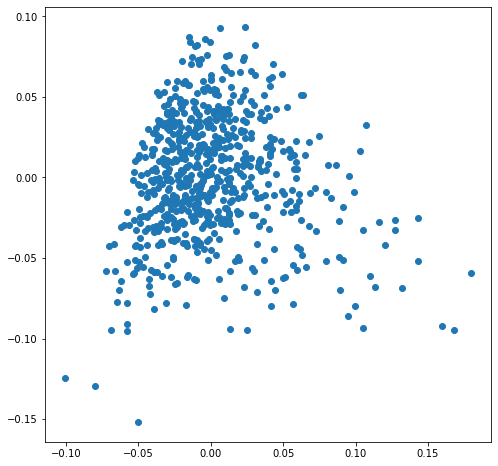

In [11]:
pca = PCA(n_components = 2)
prin_comps = pca.fit(D_raw);

print(len(prin_comps.components_[0]))
# prin_comp_1 = prin_comps[:, 0]
# prin_comp_2  = prin_comps[:, 1]

figure, axes = plt.subplots(figsize = (8,8))
axes.scatter(prin_comps.components_[0], prin_comps.components_[1])


### PCA on track features to see if there are any clusters in 2 dimensions

In [12]:
# Build the data matrix and condition it

columns = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]
df1 = spotify_artists_top_tracks_df[columns]
scaler = StandardScaler()
df1 = scaler.fit_transform(df1)
D_raw = df1

m, d = D_raw.shape
print("D_raw:", D_raw.shape)

D_raw: (690, 11)


11


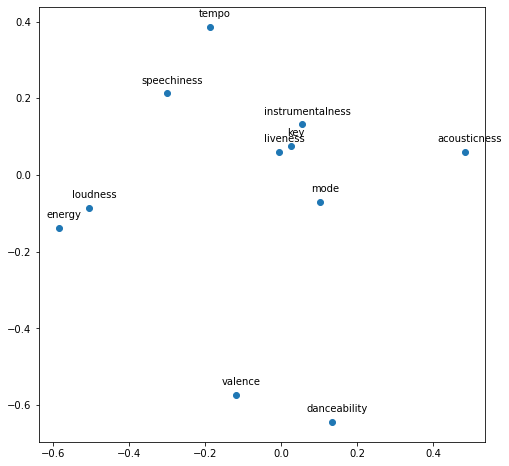

In [13]:
pca = PCA(n_components = 2)
prin_comps = pca.fit(D_raw);

print(len(prin_comps.components_[0]))
figure, axes = plt.subplots(figsize = (8,8))
axes.scatter(prin_comps.components_[0], prin_comps.components_[1])

for i in range(0, len(columns)):

    plt.annotate(columns[i], # this is the text
                 (prin_comps.components_[0][i], prin_comps.components_[1][i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(5,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

### PCA on track features to reduce dimensionality

(11,)


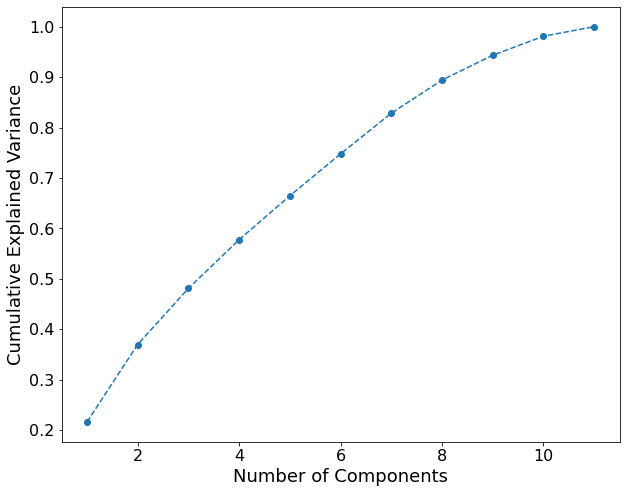

In [14]:
pca = PCA()
pca.fit(D_raw);

evr = pca.explained_variance_ratio_
print(evr.shape)
fig = plt.figure(figsize=(10,8))
plt.plot(range(1, D_raw.shape[1]+1), evr.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components', fontsize=18)
plt.ylabel('Cumulative Explained Variance',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# fig = plt.savefig("./visualizations/cumulative_variance_plot.png")
plt.show()

In [15]:
n_comps = 7
pca = PCA(n_components = n_comps)
prin_comps = pca.fit(D_raw);
D_pca = pca.transform(D_raw)

print("D_pca: ", D_pca.shape)

D_pca:  (690, 7)


### K Means on reduced dimension dataset

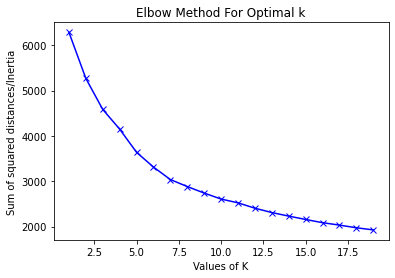

In [16]:
Sum_of_squared_distances = []
K = range(1,20)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=10)
 kmeans.fit(D_pca)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()
 

In [17]:
n_clusters = 7
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=10)
kmeans_pca.fit(D_pca);

In [18]:
columns = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]
df1 = spotify_artists_top_tracks_df[columns]
df_seg_pca_kmeans = pd.concat([df1.reset_index(drop=True), pd.DataFrame(D_pca)], axis=1)
df_seg_pca_kmeans.columns.values[(-1*n_comps):] = ["Component " + str(i+1) for i in range(n_comps)]
df_seg_pca_kmeans['Cluster'] = kmeans_pca.labels_
df_seg_pca_kmeans.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Cluster
0,0.545,0.865,11,-5.708,0,0.0286,0.00664,0.000011,0.168,0.543,99.009,-0.492934,-0.780726,-1.792940,0.271790,-1.786189,0.178496,0.074605,1
1,0.557,0.533,10,-6.817,0,0.0252,0.04920,0.000000,0.205,0.233,143.994,1.032481,0.857731,-1.404672,-0.429280,-1.604192,0.255454,0.588081,1
2,0.530,0.768,7,-5.611,1,0.0284,0.00385,0.000000,0.103,0.374,148.095,-0.178505,0.166824,-0.329570,-0.625739,0.309746,-0.844373,-0.218597,4
3,0.547,0.575,10,-6.282,0,0.0258,0.01980,0.000000,0.205,0.311,143.752,0.609732,0.637525,-1.420837,-0.410903,-1.549429,0.210783,0.657870,1
4,0.532,0.935,0,-4.798,1,0.0619,0.00133,0.000008,0.106,0.309,128.025,-1.127720,-0.073727,0.729945,-0.964069,0.844805,0.407517,-0.859343,4


C:\Users\19197\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


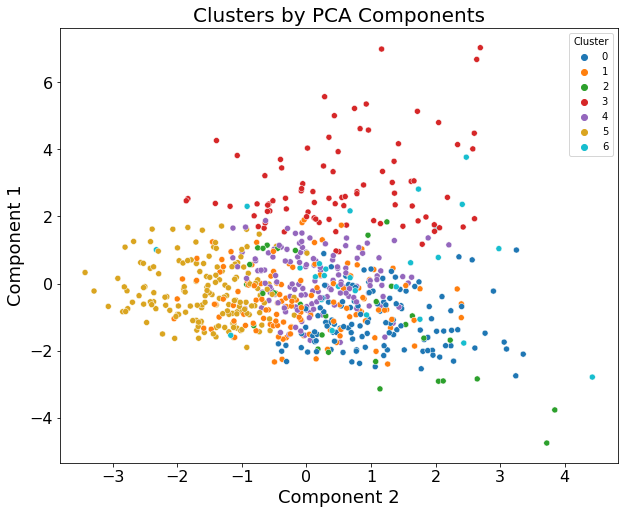

In [19]:
x = df_seg_pca_kmeans['Component 2']
y = df_seg_pca_kmeans['Component 1']
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, hue=df_seg_pca_kmeans['Cluster'], palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'goldenrod', 'tab:cyan'])
plt.title('Clusters by PCA Components', fontsize=20)
plt.xlabel("Component 2", fontsize=18)
plt.ylabel("Component 1", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [20]:
spotify_artists_top_tracks_df['Cluster'] = df_seg_pca_kmeans['Cluster']
display(spotify_artists_top_tracks_df.head())

,artist_uri,albumn_name,albumn_release_date,albumn_total_tracks,duration_ms,explicit,track_name,track_popularity,track_uri,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Cluster
0,spotify:artist:2RTUTCvo6onsAnheUk3aL9,The Better Life,2000,11,233933,False,Kryptonite,80,spotify:track:6ZOBP3NvffbU4SZcrnt1k6,0.545,...,-5.708,0,0.0286,0.00664,0.000011,0.168,0.543,99.009,4,1
1,spotify:artist:2RTUTCvo6onsAnheUk3aL9,Away From The Sun,11/12/2002,12,238733,False,Here Without You,77,spotify:track:3NLrRZoMF0Lx6zTlYqeIo4,0.557,...,-6.817,0,0.0252,0.04920,0.000000,0.205,0.233,143.994,4,1
2,spotify:artist:2RTUTCvo6onsAnheUk3aL9,Away From The Sun,11/12/2002,12,260333,False,When I'm Gone,70,spotify:track:3WbphvawbMZ8FyqDxYGdSQ,0.530,...,-5.611,1,0.0284,0.00385,0.000000,0.103,0.374,148.095,4,4
3,spotify:artist:2RTUTCvo6onsAnheUk3aL9,Here Without You (Acoustic),1/1/2004,1,232973,False,Here Without You - Acoustic,53,spotify:track:2HIU8kiFo9sB5ih05q8wgP,0.547,...,-6.282,0,0.0258,0.01980,0.000000,0.205,0.311,143.752,4,1
4,spotify:artist:2RTUTCvo6onsAnheUk3aL9,3 Doors Down,1/1/2008,12,241960,False,It's Not My Time,63,spotify:track:0uybt73QFXaLCoxuVf6fhm,0.532,...,-4.798,1,0.0619,0.00133,0.000008,0.106,0.309,128.025,4,4


In [21]:
def make_normalized_df(df, col_sep):
    non_features = df[df.columns[:col_sep]]
    features = df[df.columns[col_sep:]]
    norm = MinMaxScaler().fit_transform(features)
    scaled = pd.DataFrame(norm, index=df.index, columns = df.columns[col_sep:])
    return pd.concat([non_features, scaled], axis=1)

cluster_labels = spotify_artists_top_tracks_df['Cluster']
orig = spotify_artists_top_tracks_df.drop(columns=['Cluster'])
values_df = make_normalized_df(orig, 9)
values_df.insert(3, 'cluster', cluster_labels)
values_df.head()

,artist_uri,albumn_name,albumn_release_date,cluster,albumn_total_tracks,duration_ms,explicit,track_name,track_popularity,track_uri,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,spotify:artist:2RTUTCvo6onsAnheUk3aL9,The Better Life,2000,1,11,233933,False,Kryptonite,80,spotify:track:6ZOBP3NvffbU4SZcrnt1k6,...,1.000000,0.771674,0.0,0.012474,0.006908,0.000012,0.155044,0.538806,0.252058,1.0
1,spotify:artist:2RTUTCvo6onsAnheUk3aL9,Away From The Sun,11/12/2002,1,12,238733,False,Here Without You,77,spotify:track:3NLrRZoMF0Lx6zTlYqeIo4,...,0.909091,0.711053,0.0,0.004763,0.051195,0.000000,0.192711,0.207857,0.561973,1.0
2,spotify:artist:2RTUTCvo6onsAnheUk3aL9,Away From The Sun,11/12/2002,4,12,260333,False,When I'm Gone,70,spotify:track:3WbphvawbMZ8FyqDxYGdSQ,...,0.636364,0.776976,1.0,0.012021,0.004005,0.000000,0.088873,0.358386,0.590225,1.0
3,spotify:artist:2RTUTCvo6onsAnheUk3aL9,Here Without You (Acoustic),1/1/2004,1,1,232973,False,Here Without You - Acoustic,53,spotify:track:2HIU8kiFo9sB5ih05q8wgP,...,0.909091,0.740297,0.0,0.006124,0.020602,0.000000,0.192711,0.291128,0.560305,1.0
4,spotify:artist:2RTUTCvo6onsAnheUk3aL9,3 Doors Down,1/1/2008,4,12,241960,False,It's Not My Time,63,spotify:track:0uybt73QFXaLCoxuVf6fhm,...,0.000000,0.821417,1.0,0.088002,0.001383,0.000009,0.091927,0.288993,0.451958,1.0


124


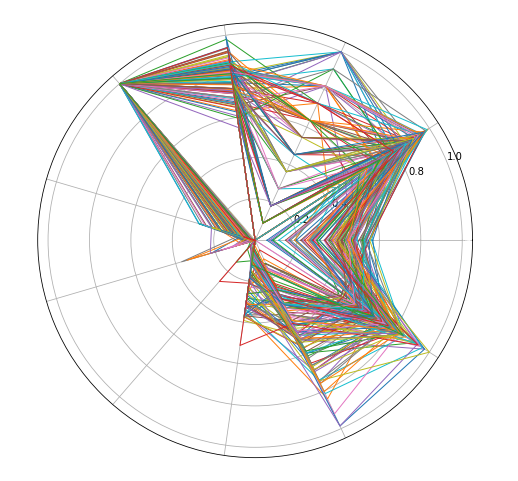

In [22]:
columns = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]

temp = values_df[values_df["cluster"] == 0]
temp = temp[columns]
temp = temp.values.tolist()

# temp = [data[i] for i in randi]
print(len(temp))
data1 = [i.append(i[0]) or i for i in temp]
# print(data1[0])


# Initialise the spider plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
# print(columns)
angles = [n / float(len(columns)) * 2 * pi for n in range(len(columns))]
angles += angles[:1]

# print(angles)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], columns, color='white', size=8)



# Plot data
for i in data1:
    ax.plot(angles, i, linewidth=1, linestyle='solid')

    
# Show the graph
plt.show()

124


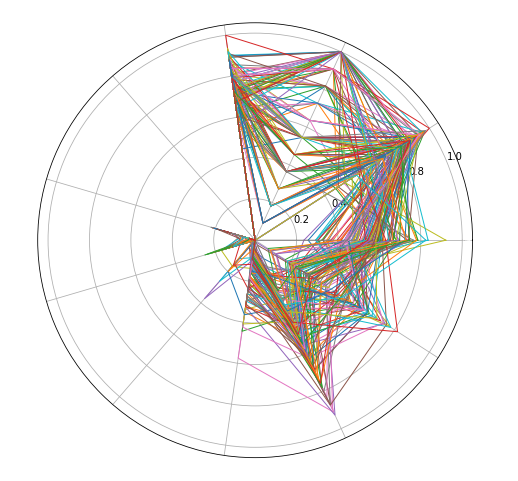

In [23]:
columns = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]

temp = values_df[values_df["cluster"] == 1]
temp = temp[columns]
temp = temp.values.tolist()

# temp = [data[i] for i in randi]
print(len(temp))
data1 = [i.append(i[0]) or i for i in temp]
# print(data1[0])


# Initialise the spider plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
# print(columns)
angles = [n / float(len(columns)) * 2 * pi for n in range(len(columns))]
angles += angles[:1]

# print(angles)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], columns, color='white', size=8)



# Plot data
for i in data1:
    ax.plot(angles, i, linewidth=1, linestyle='solid')

    
# Show the graph
plt.show()

30


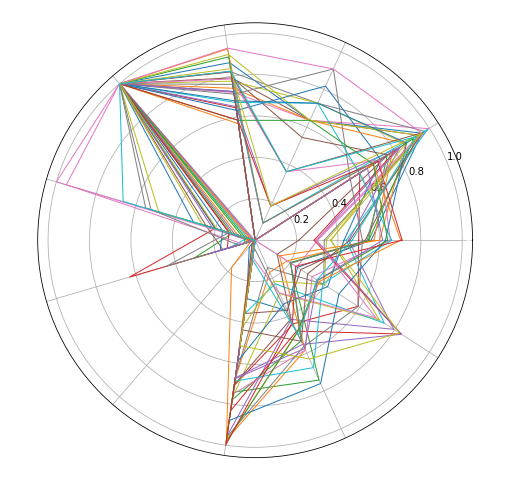

In [24]:
columns = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]

temp = values_df[values_df["cluster"] == 2]
temp = temp[columns]
temp = temp.values.tolist()

# temp = [data[i] for i in randi]
print(len(temp))
data1 = [i.append(i[0]) or i for i in temp]
# print(data1[0])


# Initialise the spider plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
# print(columns)
angles = [n / float(len(columns)) * 2 * pi for n in range(len(columns))]
angles += angles[:1]

# print(angles)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], columns, color='white', size=8)



# Plot data
for i in data1:
    ax.plot(angles, i, linewidth=1, linestyle='solid')

    
# Show the graph
plt.show()

85


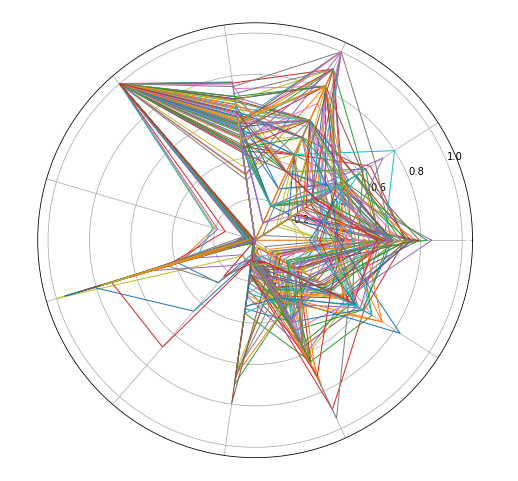

In [25]:
columns = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]

temp = values_df[values_df["cluster"] == 3]
temp = temp[columns]
temp = temp.values.tolist()

# temp = [data[i] for i in randi]
print(len(temp))
data1 = [i.append(i[0]) or i for i in temp]
# print(data1[0])


# Initialise the spider plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
# print(columns)
angles = [n / float(len(columns)) * 2 * pi for n in range(len(columns))]
angles += angles[:1]

# print(angles)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], columns, color='white', size=8)



# Plot data
for i in data1:
    ax.plot(angles, i, linewidth=1, linestyle='solid')

    
# Show the graph
plt.show()

140


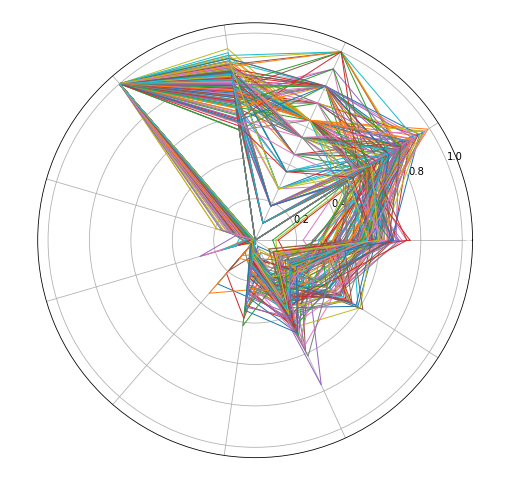

In [26]:
columns = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]

temp = values_df[values_df["cluster"] == 4]
temp = temp[columns]
temp = temp.values.tolist()

# temp = [data[i] for i in randi]
print(len(temp))
data1 = [i.append(i[0]) or i for i in temp]
# print(data1[0])


# Initialise the spider plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
# print(columns)
angles = [n / float(len(columns)) * 2 * pi for n in range(len(columns))]
angles += angles[:1]

# print(angles)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], columns, color='white', size=8)



# Plot data
for i in data1:
    ax.plot(angles, i, linewidth=1, linestyle='solid')

    
# Show the graph
plt.show()

161


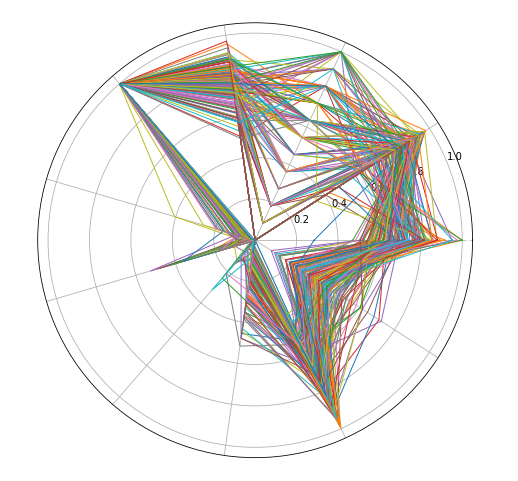

In [27]:
columns = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]

temp = values_df[values_df["cluster"] == 5]
temp = temp[columns]
temp = temp.values.tolist()

# temp = [data[i] for i in randi]
print(len(temp))
data1 = [i.append(i[0]) or i for i in temp]
# print(data1[0])


# Initialise the spider plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
# print(columns)
angles = [n / float(len(columns)) * 2 * pi for n in range(len(columns))]
angles += angles[:1]

# print(angles)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], columns, color='white', size=8)



# Plot data
for i in data1:
    ax.plot(angles, i, linewidth=1, linestyle='solid')

    
# Show the graph
plt.show()

26


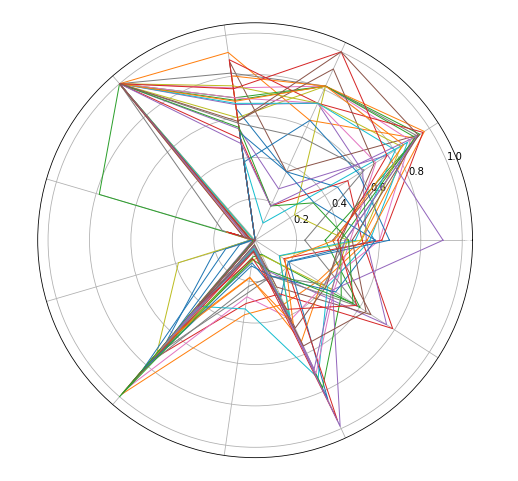

In [28]:
columns = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]

temp = values_df[values_df["cluster"] == 6]
temp = temp[columns]
temp = temp.values.tolist()

# temp = [data[i] for i in randi]
print(len(temp))
data1 = [i.append(i[0]) or i for i in temp]
# print(data1[0])


# Initialise the spider plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
# print(columns)
angles = [n / float(len(columns)) * 2 * pi for n in range(len(columns))]
angles += angles[:1]

# print(angles)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], columns, color='white', size=8)



# Plot data
for i in data1:
    ax.plot(angles, i, linewidth=1, linestyle='solid')

    
# Show the graph
plt.show()